In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls="/content/gdrive/My Drive/Plant Disease Detection"


In [5]:
batch_size = 32
img_height = 256
img_width = 256

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Plant Disease Detection/dataset/training_set',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4008 files belonging to 5 classes.
Using 3207 files for training.


In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Plant Disease Detection/dataset/testing_set',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 619 files belonging to 5 classes.
Using 123 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


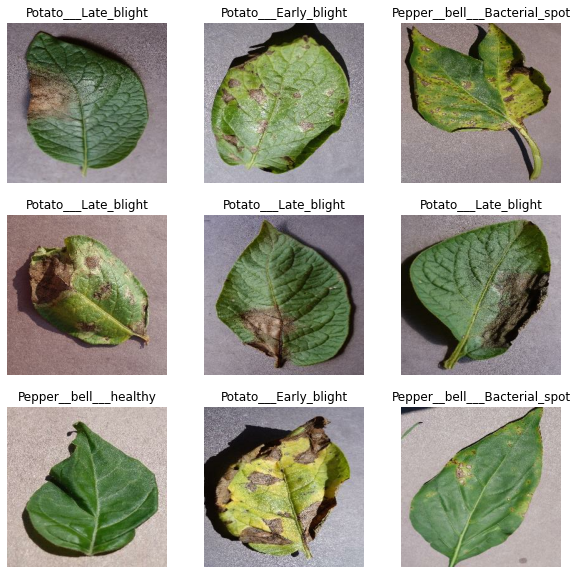

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [12]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=train_ds,
  epochs=epochs
)

Epoch 1/10
101/101 [==============================] - 219s 2s/step - loss: 0.8629 - accuracy: 0.6548 - val_loss: 0.3527 - val_accuracy: 0.8881
Epoch 2/10
101/101 [==============================] - 220s 2s/step - loss: 0.3331 - accuracy: 0.8918 - val_loss: 0.4472 - val_accuracy: 0.8516
Epoch 3/10
101/101 [==============================] - 222s 2s/step - loss: 0.2048 - accuracy: 0.9308 - val_loss: 0.0676 - val_accuracy: 0.9804
Epoch 4/10
101/101 [==============================] - 217s 2s/step - loss: 0.1334 - accuracy: 0.9595 - val_loss: 0.0714 - val_accuracy: 0.9816
Epoch 5/10
101/101 [==============================] - 217s 2s/step - loss: 0.0789 - accuracy: 0.9747 - val_loss: 0.0421 - val_accuracy: 0.9878
Epoch 6/10
101/101 [==============================] - 217s 2s/step - loss: 0.0649 - accuracy: 0.9816 - val_loss: 0.1416 - val_accuracy: 0.9467
Epoch 7/10
101/101 [==============================] - 216s 2s/step - loss: 0.0527 - accuracy: 0.9819 - val_loss: 0.0088 - val_accuracy: 0.9991

Text(0.5, 1.0, 'Training and Validation Accuracy')

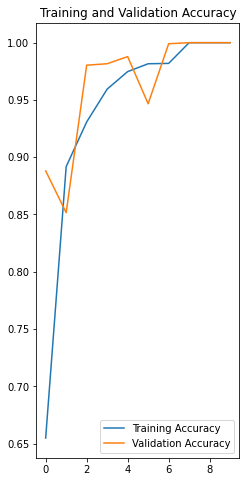

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

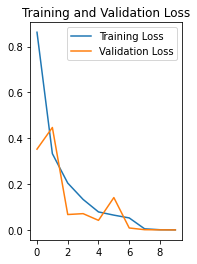

In [18]:

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
tf.keras.models.save_model(model,'my_model_weights.hdf5')

In [21]:

img = keras.preprocessing.image.load_img(
   '/content/gdrive/MyDrive/Plant Disease Detection/dataset/single_prediction/0e6b9e09-2bcd-41e0-b001-b80a33a8a78b___RS_Early.B 8694.JPG' , target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to Potato___Early_blight with a 97.78 percent confidence.


In [24]:
!pip install streamlit

In [90]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image ,ImageOps
import numpy as np
 

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model_weights.hdf5')
  return model

model=load_model()
st.write("""
# Plant Disease Detection



""")

file=st.file_uploader("pleas upload an plant image",type=["jpg","png"])

def import_and_predict(image_data , model):
  size(256,256)
  image = ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=img[np.newaxis,...]
  prediction=model.predict(imge_reshape)
  return prediction



if file is None:
  st.text("pleas uplod an image file ")
else:
  imge=Image.open(file)
  st.image(image,use_column_width=True)
  predictions=import_and_predict(imge,model)
  class_names=['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
  string="this imge most likely is:"+class_names[np.argmax(predictions)]
  st.success(srting)

Overwriting app.py


In [49]:
!/ngrok authtoken 1l1BjthbHvaU5sdeBKyabilf4kC_4UzrJwM7A49N6q54mphni

/bin/bash: /ngrok: No such file or directory


In [54]:
pip install streamlit

In [56]:
!pip install pyngrok


  Created wheel for pyngrok: filename=pyngrok-5.0.0-cp36-none-any.whl size=18780 sha256=27a06963c6814e8903ed2d4eb8ccedf1ebec6245e8e4672f556c1df7f5a9e9bf
  Stored in directory: /root/.cache/pip/wheels/95/df/23/af8dde08c3fcdc7b966adcacef48ab29aa3b0b1860df5d2b79
Successfully built pyngrok


In [65]:
./ngrok authtoken 1l1BjthbHvaU5sdeBKyabilf4kC_4UzrJwM7A49N6q54mphni


SyntaxError: ignored

In [58]:
!ls

app.py	gdrive	my_model_weights.hdf5  sample_data


In [61]:
!pip install -q streamlit

In [62]:
streamlit hello

SyntaxError: ignored

In [63]:
!nohub streamlit run app.py &

/bin/bash: nohub: command not found


In [67]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-11-30 17:38:32--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.21.141.169, 18.213.76.145, 34.232.108.170, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.21.141.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  36.0MB/s    in 0.4s    

2020-11-30 17:38:32 (36.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [68]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [94]:
get_ipython().system_raw('./ngrok http 8501 &')

In [95]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: http://bd843ab166a9.ngrok.io


In [96]:
!streamlit run /content/app.py

2020-11-30 17:54:59.093326: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.223.121.243:8501

2020-11-30 17:55:00.640227: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-30 17:55:00.652710: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-11-30 17:55:00.652781: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a6b5489482bf): /proc/driver/nvidia/version does not exist
2020-11-30 17:55:00.668939: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2250000000 Hz
2020-11-30 17:55:00.669273: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1